In [886]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import polyval, polyfit, interpolate

# Data

In [887]:
NEW_POINTS_COINT = 6

In [888]:
data = np.array([[1,1134], [2,1084], [3,993.5], [4,799.5]])

In [889]:
#data = np.array([[1,1134], [2,400], [3,399.5], [4,100.5]])

In [890]:
#data = np.array([[1,799], [2,854], [3,999.5], [4,1000.5]])

In [891]:
fit = np.polyfit(data[:,0], data[:,1] ,1)

In [892]:
fit 

array([ -109.4 ,  1276.25])

In [893]:
line = np.poly1d(fit)
new_points = np.arange(NEW_POINTS_COINT)+len(data)+1
print(new_points)

[ 5  6  7  8  9 10]


In [894]:
new_y = line(new_points)

In [895]:
new_y[new_y < 0 ] = 0

In [896]:
print(new_y)
noise = np.random.normal(new_y,scale=(np.average(data)/10), size=len(new_y))
print(noise)
noise[noise < 0] = 0
print(noise)

[ 729.25  619.85  510.45  401.05  291.65  182.25]
[ 692.88545247  632.73650255  464.94200695  324.46005997  242.86916291
  198.99554607]
[ 692.88545247  632.73650255  464.94200695  324.46005997  242.86916291
  198.99554607]


In [897]:
new_ywn = noise

In [898]:
data_line = np.stack((new_points, new_y), axis=-1)
data_line = np.append(data, data_line, axis=0)
print(data_line)

[[  1.00000000e+00   1.13400000e+03]
 [  2.00000000e+00   1.08400000e+03]
 [  3.00000000e+00   9.93500000e+02]
 [  4.00000000e+00   7.99500000e+02]
 [  5.00000000e+00   7.29250000e+02]
 [  6.00000000e+00   6.19850000e+02]
 [  7.00000000e+00   5.10450000e+02]
 [  8.00000000e+00   4.01050000e+02]
 [  9.00000000e+00   2.91650000e+02]
 [  1.00000000e+01   1.82250000e+02]]


In [899]:
data2 = np.stack((new_points, new_ywn), axis=-1)
data3 = np.append(data[3:], data2, axis=0)
data4=data3[:,1]
print(data4)

[ 799.5         692.88545247  632.73650255  464.94200695  324.46005997
  242.86916291  198.99554607]


In [900]:
data4[data4 <0] = 0
data_z = np.where(data4 ==0)[0]
if data_z.any():
    data5 = (data4[:data_z[0]+1])
else:
    data5 = data4

[ 799.5         692.88545247  632.73650255  464.94200695  324.46005997
  242.86916291  198.99554607] [[  1.00000000e+00   1.13400000e+03]
 [  2.00000000e+00   1.08400000e+03]
 [  3.00000000e+00   9.93500000e+02]
 [  4.00000000e+00   7.99500000e+02]
 [  5.00000000e+00   7.29250000e+02]
 [  6.00000000e+00   6.19850000e+02]
 [  7.00000000e+00   5.10450000e+02]
 [  8.00000000e+00   4.01050000e+02]
 [  9.00000000e+00   2.91650000e+02]
 [  1.00000000e+01   1.82250000e+02]] 8


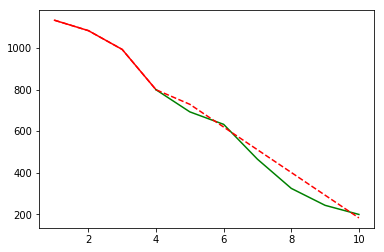

In [901]:
print(data5, data_line, len(data5)+1)
plt.plot(data[:,0], data[:,1],'r', data3[:,0], data3[:,1], 'green', data_line[:,0], data_line[:,1], 'r--')

## other shit

In [902]:
f = interpolate.interp1d(x, y, fill_value = "extrapolate")

ValueError: x and y arrays must be equal in length along interpolation axis.

In [ ]:
print(f(1))

In [ ]:
plt.plot(line(new_points))

## some shit

In [4]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [5]:
def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

In [7]:
 x = np.array([0, 1, 2, 3])
 y = np.array([1134, 1084, 993.5, 799.5])

In [8]:
fitting_parameters, covariance = curve_fit(exponential_fit, x, y)
a, b, c = fitting_parameters

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [9]:
next_x = 4
next_y = exponential_fit(next_x, a, b, c)

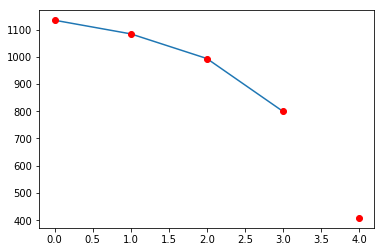

In [10]:
plt.plot(y)
plt.plot(np.append(y, next_y), 'ro')
plt.show()

4 408.431136658
5 -388.407598723
6 -2010.82053248
7 -5314.15357938
8 -12039.9439079
9 -25734.0688722
10 -53616.1540072


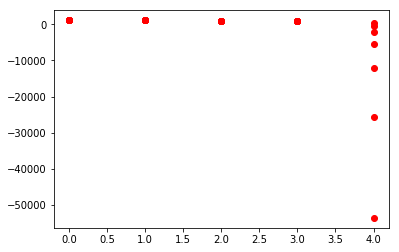

In [11]:
for i in list(range(4, 11)):
    next_x =i
    next_y = exponential_fit(next_x, a, b, c)
    print(next_x, next_y)
    plt.plot(np.append(y, next_y), 'ro')

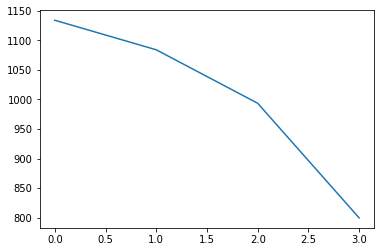

In [12]:
plt.plot(y)
plt.show()